In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy
import itertools
import tqdm
from datetime import datetime
import netCDF4 as nc 
from scipy.stats import linregress
from scipy.interpolate import griddata
import warnings
import pickle
warnings.filterwarnings("ignore")


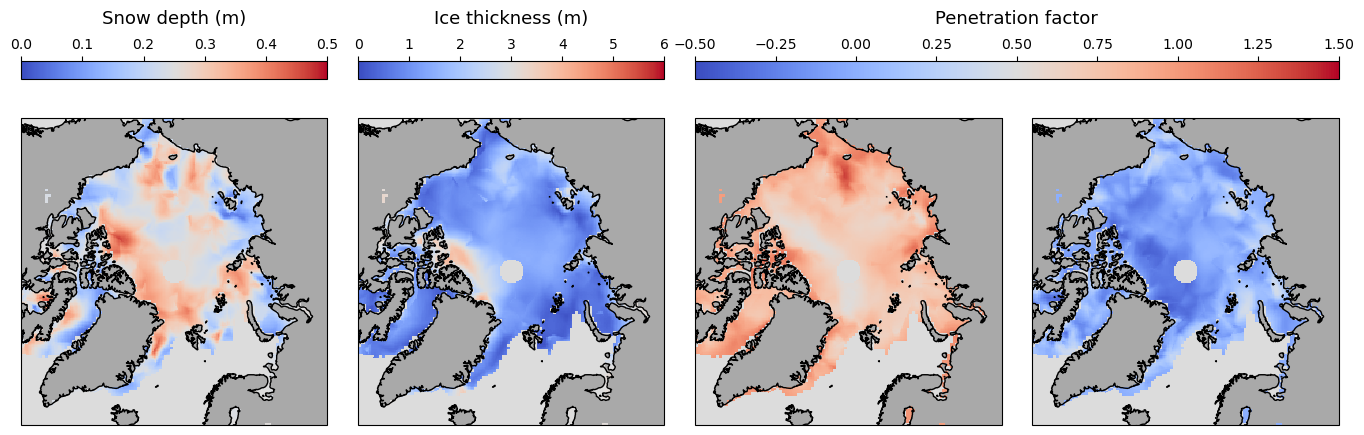

In [2]:
# change these according to date
snow_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_4p_LARM/results_npy/non_interpolated_input/201904/15IS2ATLv6_tesselationDelaunay_initcell1500_iteration1500000_proposalis2_0.8_cs2_0.8_window15j_prioris2uniform-0.5-0.5_priorcs2uniform0.5-1.5_errorinput_snow.npy")
ice_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_4p_LARM/results_npy/non_interpolated_input/201904/15IS2ATLv6_tesselationDelaunay_initcell1500_iteration1500000_proposalis2_0.8_cs2_0.8_window15j_prioris2uniform-0.5-0.5_priorcs2uniform0.5-1.5_errorinput_ice.npy")
cs_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_4p_LARM/results_npy/non_interpolated_input/201904/15IS2ATLv6_tesselationDelaunay_initcell1500_iteration1500000_proposalis2_0.8_cs2_0.8_window15j_prioris2uniform-0.5-0.5_priorcs2uniform0.5-1.5_errorinput_cs2penetration.npy")
is_april = np.load("/home/erb/masterproject/MSCI_project/snow_ice/CS_IS2_4p_LARM/results_npy/non_interpolated_input/201904/15IS2ATLv6_tesselationDelaunay_initcell1500_iteration1500000_proposalis2_0.8_cs2_0.8_window15j_prioris2uniform-0.5-0.5_priorcs2uniform0.5-1.5_errorinput_is2penetration.npy")

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")


fig = plt.figure(figsize = (17,5))
spec = gridspec.GridSpec(ncols=4, nrows=2,wspace=0.1,hspace=0.1,height_ratios= [0.05, 1])

ax1 = fig.add_subplot(spec[4], projection=ccrs.NorthPolarStereo())
ax1.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax1.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax1.coastlines()
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_snow = ax1.pcolormesh(lon_g,lat_g, snow_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 0.5)


ax2 = fig.add_subplot(spec[5],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_ice= ax2.pcolormesh(lon_g,lat_g, ice_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = 0, vmax = 6)

ax2 = fig.add_subplot(spec[6],projection=ccrs.NorthPolarStereo())
ax2.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax2.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax2.coastlines()
ax2.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_cs = ax2.pcolormesh(lon_g,lat_g, cs_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = -0.5, vmax = 1.5)

ax1 = fig.add_subplot(spec[7], projection=ccrs.NorthPolarStereo())
ax1.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=0)
ax1.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
ax1.coastlines()
ax1.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
p_map_is = ax1.pcolormesh(lon_g,lat_g, is_april,cmap='coolwarm',alpha=1.0, transform=ccrs.PlateCarree(), vmin = -0.5, vmax = 1.5)



cax = fig.add_subplot(spec[0])
fig.colorbar(p_map_snow, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('top')
cax.set_xlabel('Snow depth (m)', labelpad = 10, fontsize = 13)
cax.xaxis.set_label_position('top')

cax = fig.add_subplot(spec[1])
fig.colorbar(p_map_ice, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('top')
cax.set_xlabel('Ice thickness (m)', labelpad = 10, fontsize = 13)
cax.xaxis.set_label_position('top')


cax = fig.add_subplot(spec[2:4])
fig.colorbar(p_map_cs, cax =cax, orientation = "horizontal")
cax.xaxis.set_ticks_position('top')
cax.set_xlabel('Penetration factor', labelpad = 10, fontsize = 13)
cax.xaxis.set_label_position('top')


